In [1]:
!pip install xgboost==1.7.0 
!pip install scikit-learn==1.1.1


ERROR: Could not find a version that satisfies the requirement xgboost==1.7.0 (from versions: 0.4a12, 0.4a13, 0.4a14, 0.4a15, 0.4a18, 0.4a19, 0.4a20, 0.4a21, 0.4a22, 0.4a23, 0.4a24, 0.4a25, 0.4a26, 0.4a27, 0.4a28, 0.4a29, 0.4a30, 0.6a1, 0.6a2, 0.7.post3, 0.7.post4, 0.71, 0.72.1, 0.80, 0.81, 0.82, 0.90, 1.0.0rc2, 1.0.0, 1.0.1, 1.0.2, 1.1.0rc1, 1.1.0rc2, 1.1.0, 1.1.1, 1.2.0rc2, 1.2.0, 1.2.1rc1, 1.2.1, 1.3.0rc1, 1.3.0.post0, 1.3.1, 1.3.2, 1.3.3, 1.4.0rc1, 1.4.0, 1.4.1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2, 1.6.0rc1, 1.6.0, 1.6.1, 1.6.2, 1.7.0.post0, 1.7.1, 1.7.2, 1.7.3, 1.7.4, 1.7.5, 1.7.6, 2.0.0rc1, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2, 2.1.3)
ERROR: No matching distribution found for xgboost==1.7.0


Stacking Model Accuracy: 1.0
Stacking Model Precision: 1.0
Stacking Model Recall: 1.0
Stacking Model F1 Score: 1.0


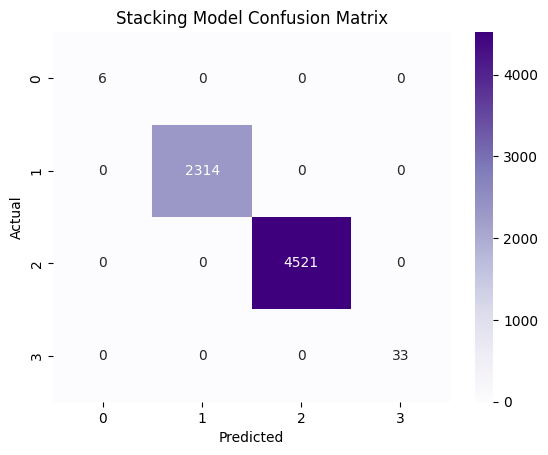


Stacking Model Classification Report:
              precision    recall  f1-score   support

       Major       1.00      1.00      1.00         6
       Minor       1.00      1.00      1.00      2314
    Moderate       1.00      1.00      1.00      4521
      Strong       1.00      1.00      1.00        33

    accuracy                           1.00      6874
   macro avg       1.00      1.00      1.00      6874
weighted avg       1.00      1.00      1.00      6874



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/cleaned_earthquakes_2023_global.csv'  
data = pd.read_csv(file_path)

data = data.dropna(subset=['mag_category'])

X = data.drop(columns=['mag_category']) 
y = data['mag_category']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
xgboost_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('xgb', xgboost_model)],
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train_scaled, y_train)

y_pred = stacking_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Stacking Model Accuracy: {accuracy}")
print(f"Stacking Model Precision: {precision}")
print(f"Stacking Model Recall: {recall}")
print(f"Stacking Model F1 Score: {f1}")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title("Stacking Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nStacking Model Classification Report:")
print(classification_report(y_test, y_pred))
